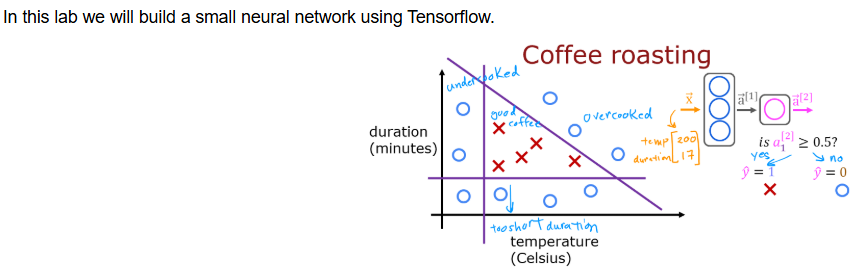

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("coffee_roasting_data.csv")
print(df.head())

   Temperature   Duration  Roast
0   202.435617  14.210158      1
1   283.100003  11.420700      0
2   252.479152  11.808144      0
3   233.812188  15.492771      0
4   171.842610  14.032145      0


In [6]:
X = df.drop("Roast", axis=1)
Y = df["Roast"]
print(X.shape, Y.shape)

(200, 2) (200,)


In [14]:
Y = Y.reshape(-1, 1)  # Shape becomes (200, 1)
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [9]:
# Convert DataFrame X to NumPy
X = X[['Temperature', 'Duration']].values
Y = Y.values


Let's plot the coffee roasting data below

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the plotting function
def plt_roast(X, Y):
    plt.figure(figsize=(8, 6))
    
    # Good roast (Y == 1)
    good = Y == 1
    plt.scatter(X[good, 0], X[good, 1], color='red', marker='X', label='Good Roast')
    
    # Bad roast (Y == 0)
    bad = Y == 0
    plt.scatter(X[bad, 0], X[bad, 1], edgecolors='b', facecolors='none', label='Bad Roast')
    
    # Labels and legend
    plt.xlabel("Temperature\n(Celsius)")
    plt.ylabel("Duration\n(minutes)")
    plt.title("Coffee Roasting")
    plt.legend()
    plt.grid(True)
    plt.show()


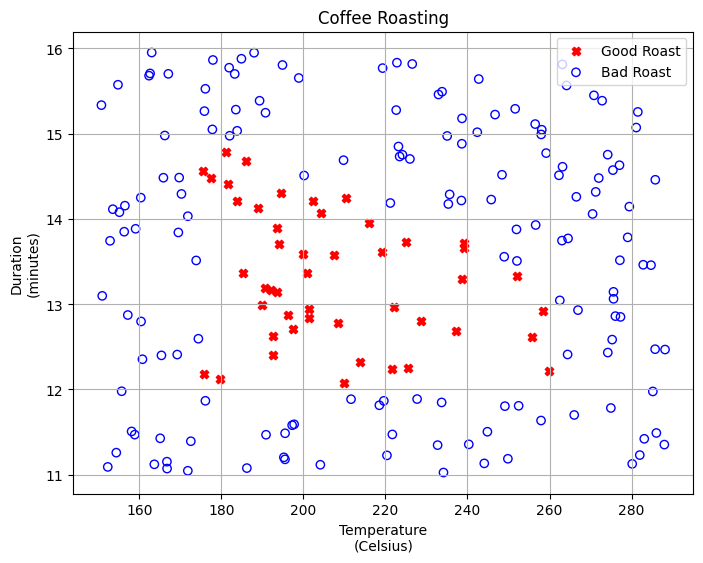

In [11]:
plt_roast(X,Y)

### Normalize Data
Fitting the weights to the data (back-propagation) will proceed more quickly if the data is normalized.

In [12]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 288.16, 150.77
Duration    Max, Min pre normalization: 15.95, 11.03
Temperature Max, Min post normalization: 1.71, -1.63
Duration    Max, Min post normalization: 1.66, -1.71


Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [15]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


## Tensorflow Mode

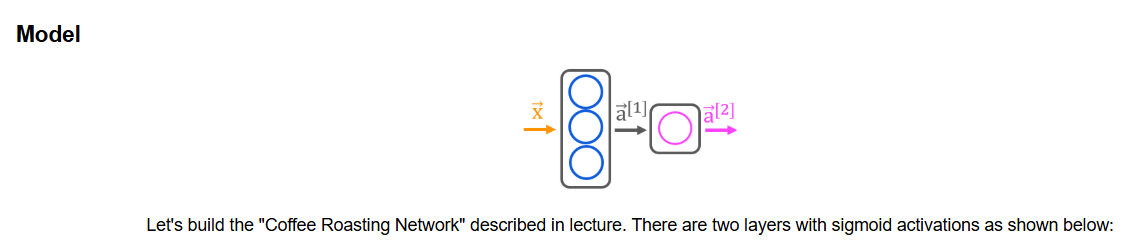